In [3]:
!pip install rasterio

In [4]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import os
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
do_dropout = False
class NN_simple(nn.Module):
    def __init__(self):
        super(NN_simple,self).__init__()

        self.layer1 = nn.Linear(3,32)
        self.layer2 = nn.Linear(32,24)
        self.layer3 = nn.Linear(24,6)
        self.layer4 = nn.Linear(6,1)
        self.layer5 = nn.Linear(4,1)
        #self.SelfAttention = SelfAttention(N_layer3)
        self.activationReLU = nn.LeakyReLU() #nn.ReLU()
        self.activationLeaky = nn.LeakyReLU()
        self.activation = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        self.Drop = nn.Dropout( 0.2 )
    def forward(self,x):
        #x = 0.2*x
        x = self.layer1(x)
        x = self.activationReLU(x)
        if do_dropout ==True:
            x = self.Drop(x)   ###!!!!!!!!!!!!
        x = self.layer2(x)
        x = self.activationReLU(x)
        if do_dropout ==True:
            x = self.Drop(x)
        x = self.layer3(x)
        x = self.activationReLU(x)
        x = self.layer4(x)
        x = 0.6*nn.functional.sigmoid(x) - 0.15

        return x #, x_hidden


In [6]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


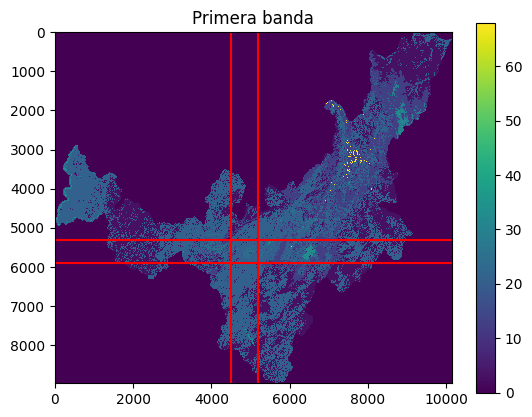

In [61]:
#tif_path = "./mapbiomas_colombia_collection2_integration_v1-classification_2023.tif"

tif_path = "/content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2016.tif"

# Abrir el archivo
with rasterio.open(tif_path) as dataset:
    band1 = dataset.read(1)

#test1 = band1[7000:12000]
#plt.imshow(test1, cmap='gray')
#plt.imshow(test1[:,2000:7000], cmap='viridis', interpolation='nearest')
#'''

y_low = 5300
y_high = 5900
x_low = 4500
x_high = 5200





plt.imshow(band1, cmap='viridis', interpolation='nearest')
plt.axvline(x = 4500, color = 'red')
plt.axvline(x = 5200, color = 'red')
plt.axhline(y = 5300, color = 'red')
plt.axhline(y = 5900, color = 'red')
plt.title("Primera banda")
plt.colorbar()
plt.show()
#'''


In [8]:
sup_forest = [1,3,5,6,49]
sup_No_forest = [10,11,12,32,29,50,13]
sup_agro = [14,9,35,21]
Sup_No_veg = [22,23,30,68,25,27]
sup_agua = [26,33,31,34]


y_low = 5300
y_high = 5900
x_low = 4500
x_high = 5200


def load_tif(path):
  with rasterio.open(path) as dataset:
      band = dataset.read(1)

      test1 = band[y_low:y_high]
      test1 = test1[:,x_low:x_high]

      for i in range(len(test1)):
        for j in range(len(test1[i])):
          if test1[i,j] == 24 :
            test1[i,j] = 7
          elif test1[i,j] in sup_forest:
            test1[i,j] = 1
          elif test1[i,j] in sup_No_forest:
            test1[i,j] = 2
          elif test1[i,j] in sup_agro:
            test1[i,j] = 3
          elif test1[i,j] in Sup_No_veg:
            test1[i,j] = 4
          elif test1[i,j] in sup_agua:
            test1[i,j] = 5
          elif test1[i,j] == 0:
            #test1[i,j] = 0
            continue
          else:
            test1[i,j] = 6

  print(f"Archivo {path} cargado correctamente.")
  return test1



['/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1988.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-2021.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1989.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1994.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-2022.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1997.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1985.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1995.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1986.tif', '/content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-2016.tif', '/content/drive/MyD

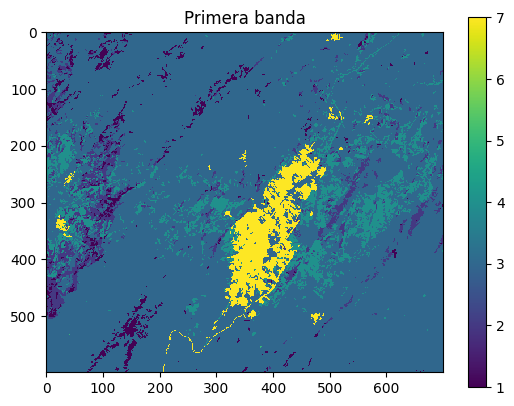

In [9]:
path_colab = "/content/drive/MyDrive/Colab Notebooks/"
maps_files = glob.glob(path_colab+'/mapas/*20*.tif')

print(maps_files )

tif_path = "/content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2005.tif"
tif_path = "/content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2020.tif"

test_func = load_tif(tif_path)

plt.imshow(test_func, cmap='viridis', interpolation='nearest')
plt.title("Primera banda")
plt.colorbar()
plt.show()

In [10]:
maps_files[1][len(maps_files[1])-8:len(maps_files[1])-4]

'2021'

In [11]:
maps_dic = {}

for map in maps_files:
  test_func = load_tif(map)
  maps_dic[map[len(map)-8:len(map)-4]] = test_func
  '''
  plt.imshow(test_func, cmap='viridis', interpolation='nearest')
  plt.title("Primera banda")
  plt.colorbar()
  plt.show()
  maps_array[map[len(map)-8:len(map)-4]] = test_func
  '''

Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1988.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-2021.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1989.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1994.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-2022.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1997.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1985.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1995.tif cargado correct

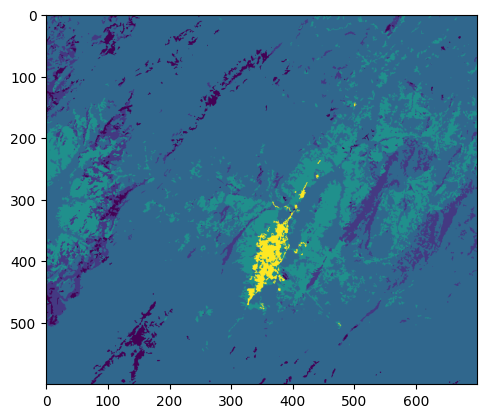

In [12]:
year_low_to_up =[]
for year in range(1986,2024):
  year_low_to_up.append(maps_dic[str(year)])


import matplotlib.animation as animation

# Create the figure and axes objects
fig, ax = plt.subplots()
# Set the initial image
im = ax.imshow(year_low_to_up[0], animated=True)

def update(i):
    im.set_array(year_low_to_up[i])
    return im,
# Create the animation object
animation_fig = animation.FuncAnimation(fig, update, frames=len(year_low_to_up), interval=200, blit=True,repeat_delay=10,)
# Show the animation
plt.show()
animation_fig.save(path_colab+"/animated_GMM.gif")

In [13]:
def find_edge(map):
  test1 = map.copy()
  test1_ok = test1.copy()

  #print(len(test1))
  #print(len(test1[0]))
  for i in range(0,len(test1)):
    #bool_change = 0
    for j in range(0,len(test1[0])):
      #bool_change = 0
      a = test1[i,j]
      if a == 0 or a == 5: # asumire que el agua no se puede convertir:
        ### test1 SOLO se usa para objetivos de debugging
        test1[i,j] = 0
        ## test1  0->margen, frontera departamento y agua, 1-> buen punto cerca de ciudad, 2-> punto lejos de ciudad que no se tendran en cuenta, 3-> puntos que ya son ciudad
        test1_ok[i,j] = 0 ## test1_ok-> puntos malos (0, 2 y 3 de test1), 1-> puntos buenos (1 de test1)
        continue
      elif a == 7:
        test1[i,j] = 3
        test1_ok[i,j] = 0
        continue
      else: #a > 0:
        bool_edge0 = 0
        bool_edge7 = 0

        if i < 2 or j<2 or i>(len(test1)-4) or j>(len(test1[0])-4) :
          #bool_edge0 == 1
          test1[i,j] = 0
          test1_ok[i,j] = 0
          continue
        #if i%301 == 300 and j%301==300:
        #  print("22")

        for m in range(i-2,i+3):
          for n in range(j-2,j+3):
            if m==i and n==j:
              continue
            else:
              b = test1[m,n]
              if b == 0 :
                bool_edge0 = 1
                break
              if b == 7:
                bool_edge7 = 1
                break
              #if i%301 == 300 and j%301==300:
              #  print("33")
              elif b ==7:
                count_agua += 1

          if bool_edge0==1:
            test1[i,j] = 0
            test1_ok[i,j] = 0
            break
          if bool_edge7==1:
            test1[i,j] = 1
            test1_ok[i,j] = 1
            break
        if bool_edge7==0:
          test1[i,j] = 2
          test1_ok[i,j] = 0

    if i %20000 == 10000:
      print(i)
  return test1, test1_ok


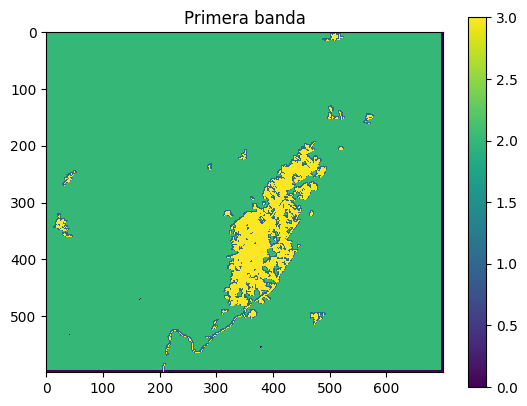

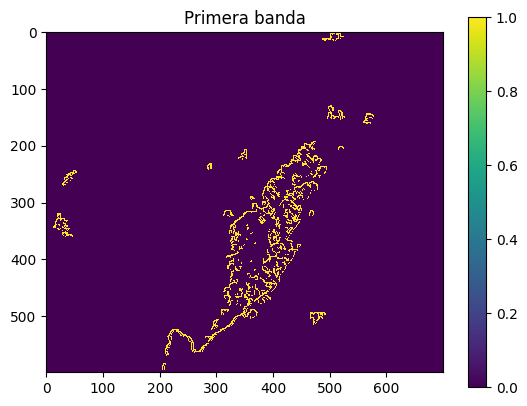

In [14]:
test_edge, test_edge_ok = find_edge(test_func)
#plt.imshow(test1[0:200,0:200], cmap='viridis', interpolation='nearest')
plt.imshow(test_edge, cmap='viridis', interpolation='nearest')
#plt.imshow(test1, cmap='viridis', interpolation='nearest')
plt.title("Primera banda")
plt.colorbar()
plt.show()
plt.imshow(test_edge_ok, cmap='viridis', interpolation='nearest')
#plt.imshow(test1, cmap='viridis', interpolation='nearest')
plt.title("Primera banda")
plt.colorbar()
plt.show()

In [15]:
maps_edges = {}

for map in maps_files:
  test_func = load_tif(map)
  _, test_edge = find_edge(test_func)
  maps_edges[map[len(map)-8:len(map)-4]] = test_edge
  '''
  plt.imshow(test_func, cmap='viridis', interpolation='nearest')
  plt.title("Primera banda")
  plt.colorbar()
  plt.show()
  maps_array[map[len(map)-8:len(map)-4]] = test_func
  '''
  year_low_to_up_edges =[]
for year in range(1986,2024):
  year_low_to_up_edges.append(maps_edges[str(year)])


Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1988.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-2021.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1989.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1994.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-2022.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1997.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1985.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks//mapas/mapbiomas-colombia-collection-20-boyaca-1995.tif cargado correct

In [16]:
empty_cells_ignored = 3
def find_points_features(map, edges_ok, map_next):
  Data = []
  test1 = map.copy()
  #test1_ok = edges_ok.copy()

  for i in range(0,len(test1)):
    bool_change = 0
    for j in range(0,len(test1[0])):
      bool_change = 0
      a = edges_ok[i,j]
      if a == 0:
        continue
      else:

        count_forest = 0
        count_No_forest = 0
        count_agro = 0
        count_agua = 0
        count_No_veg = 0
        count_urban1 = 0
        count_urban2 = 0
        count_urban3 = 0
        proximity = 4

        #if test1[i,j] == 7 : ## no interesa cuadros que ya son urbanos
        #  continue
        if i%301 == 0 and j%301==300:
          print(i,j)
        for m in range(i-2,i+3):
          for n in range(j-2,j+3):
            if m==i and n==j:
              continue
            else:

              b = test1[m,n]
              if i%301 == 300 and j%301==300:
                print("33")
              if b == 1:
                count_forest += 1
              elif b ==2:
                count_No_forest += 1
              elif b ==3:
                count_agro += 1
              elif b ==4:
                count_No_veg += 1
              elif b ==5:
                count_agua += 1
              elif b==7:
                #count_urban += 1
                proximity_point = abs(i-m)+abs(j-n)
                if proximity_point==1:
                  count_urban1 += 1
                elif proximity_point==2:
                  count_urban2 += 1
                elif proximity_point==3:
                  count_urban3 += 1
                if proximity_point < proximity:
                  proximity = proximity_point

        if map_next[i,j]==7:
          next_cell_state = 1
        else:
          next_cell_state = 0
        #out_arr = [b,count_urban1,count_urban2,count_urban3,  # quizas quitar b
        #           count_forest/2,count_No_forest/2,count_agro/2,count_No_veg/2, #count_agua,
        #           next_cell_state]
        '''
        out_arr = [b,count_urban1,count_urban2,count_urban3,  # quizas quitar b
                   count_forest+count_No_forest,count_agro/2,count_No_veg/2, proximity,#count_agua,
                   next_cell_state]
        '''
        out_arr = [count_urban1/2,count_urban2/2,count_urban3/2,  # quizas quitar b
                   proximity,#count_agua,
                   next_cell_state]

        out_arr = np.array(out_arr).astype(np.float32)


        if proximity > 3:
          continue
        if next_cell_state==1:
          Data.append(out_arr)
        if next_cell_state==0 and (i+j)%empty_cells_ignored==0:   ## y si quito cuando esta en 3 unicamente para entrenar (no como feature) usando proximity_point
          Data.append(out_arr)

  return Data


In [18]:
data_test = np.array([])
year_low_to_up =[]
count_year = 0
for year in range(2006,2018):  # (1986,2023)
  count_year+=1
  print(year)
  data_test_year = find_points_features(maps_dic[str(year)], maps_edges[str(year)], maps_dic[str(year+1)])
  if count_year==1:
    year_low_to_up = data_test_year
  else:
    year_low_to_up = np.concatenate((year_low_to_up, data_test_year))



2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [23]:
np.shape(year_low_to_up)
# (8128, 10)
# (7629, 10) #proximity 4
# (6828, 10) #proximity 3

(31293, 5)

In [25]:
count=0
for arr_i in year_low_to_up:
  if arr_i[-1]==1:
    count+=1
print(count)
#149
#1540
#proximity 4
#145
#1506
#proximity 3
#136
#1436

145
2160


In [26]:
data_test_2 = []
for arr_i in year_low_to_up:
  if arr_i[3]>2:
    count+=1
    data_test_2.append(arr_i)
print(count)

5736


In [ ]:
bad = (8128 - 7629) / 8128
good = (1540 - 1506) / 1470
print(bad)
print(good)

bad = (8128 - 6828) / 8128
good = (1540 - 1436) / 1470
print(bad)
print(good)


0.06139271653543307
0.02312925170068027
0.15994094488188976
0.0707482993197279


In [ ]:
count=0
for arr_i in year_low_to_up:
  if arr_i[4]==0:
    count+=1
print(count)


29133


In [ ]:
# cuenta de proximity
'''
count_year=0
for arr_i in year_low_to_up:
  if arr_i[3] > 3 :
    count_year+=1
    if count_year==1:
      data_test_2 = np.array([arr_i])
    else:
      data_test_2 = np.concatenate((data_test_2, np.array([arr_i])))
print(count_year)


count=0
for arr_i in data_test_2:
  if arr_i[-1]==1:
    count+=1
print(count)
'''

'\ncount_year=0\nfor arr_i in year_low_to_up:\n  if arr_i[3] > 3 :\n    count_year+=1\n    if count_year==1:\n      data_test_2 = np.array([arr_i])\n    else:\n      data_test_2 = np.concatenate((data_test_2, np.array([arr_i])))\nprint(count_year)\n\n\ncount=0\nfor arr_i in data_test_2:\n  if arr_i[-1]==1:\n    count+=1\nprint(count)\n'

In [ ]:

def r2_score_torch(y_pred, y_true):
  weights = torch.ones_like(y_true) + 1*y_true
  #numerator = torch.abs(y_true - y_pred)
  numerator = (y_true - y_pred)**2
  numerator = torch.mean(numerator)
  mean_value_loss = ( 10*torch.mean(y_pred) - 10*torch.mean(y_true) )**2
  loss_total = 1.0*mean_value_loss + 20.0*numerator + 1 / (torch.std_mean(y_pred)[0] + 10)
  return loss_total
'''

def r2_score_torch(y_pred, y_true):
  mean_value_loss = ( 100*torch.mean(y_pred) - 100*0.1143 )**2
  #mean_value_loss =   torch.mean(y_pred) - torch.mean(y_true)
  return mean_value_loss
'''

def r2_score_torch_test(y_pred, y_true):
  y_true = y_true #/ 5
  y_pred = y_pred #/ 5
  weights = torch.ones_like(y_pred) + 3*y_true
  #weights = 20*y_pred

  print(y_true[:25])
  print(y_pred[:25])
  numerator = torch.abs(y_true - y_pred)
  print(numerator[:25])
  print(torch.sum(numerator))
  return torch.sum(weights*numerator)


In [21]:
train_loader = torch.utils.data.DataLoader(year_low_to_up, batch_size=2500, shuffle=True)

model_nn = NN_simple()

learning_ratio = 0.0001
optimizer = torch.optim.Adam(model_nn.parameters(), lr=learning_ratio , eps=1e-06, betas=(0.4, 0.999) )
#optimizer = torch.optim.AdamW(model_nn.parameters(), lr=learning_ratio , eps=1e-06, betas=(0.2, 0.999))
optimizer2 = torch.optim.Adam(model_nn.parameters(), lr=1*learning_ratio , eps=1e-06, betas=(0.4, 0.999) )
optimizer3 = torch.optim.SGD(model_nn.parameters(), lr=0.5*learning_ratio )
#optimizer = torch.optim.SGD(model_nn.parameters(), lr=learning_ratio )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
model_nn.train()
epochs = 600

opt_1 = True
opt_2 = True

for epoch in range(epochs):
  loss1_arr = []
  for index, data in enumerate(train_loader):
    if len(data)<2000:
      continue
    #print(index,data)
    eee = model_nn(data[:,:3])
    labels = data[:,-1]
    labels = torch.reshape(labels, (int(list(labels.shape)[0]),1))
    loss1 = r2_score_torch(eee, labels)
    if index%12000==10000:
      print(loss1.item())
    loss1.backward()
    if opt_1:
      optimizer.step()
    elif opt_2:
      optimizer2.step()
    else:
      optimizer3.step()
  loss1_arr.append(loss1.item() )
  loss1_epoch = np.array(loss1_arr)
  loss1_epoch = loss1_epoch.mean()
  if epoch==0:
    loss_control = loss1.item()
  if loss1_epoch < 0  and opt_1:
    opt_1 = False
    print("cambio a optimizador1")
  if loss1_epoch < 0  and opt_2  :
    opt_2 = False
    print("cambio a optimizador2")
  #print(epoch, " ", loss1_epoch)

  #aaa_H = np.array(data_test_2)
  aaa_H = torch.tensor(data_test_2, dtype=torch.float32)#.to(device)
  aaa_out_H = model_nn( aaa_H[:,:3] )
  #aaa = np.array(year_low_to_up)
  aaa = torch.tensor(year_low_to_up, dtype=torch.float32)#.to(device)
  aaa_out = model_nn( aaa[:,:3] )
  print(epoch, " ", loss1_epoch, "   ", torch.mean(aaa_out), "11" , torch.mean(aaa_H[:,-1])/torch.mean(aaa_out_H) , " ",  torch.mean(aaa[:,-1])/torch.mean(aaa_out))


0   1.1700246334075928     tensor(0.0681, grad_fn=<MeanBackward0>) 11 tensor(0.9740, grad_fn=<DivBackward0>)   tensor(1.0131, grad_fn=<DivBackward0>)


In [ ]:
aaa = np.array(year_low_to_up)
aaa = torch.tensor(year_low_to_up, dtype=torch.float32)#.to(device)
aaa_out = model_nn( aaa[:,:3] )
print(torch.mean(aaa_out))
print(torch.mean(aaa[:,-1]))


for i in range(0,len(aaa_out)): # len(aaa_out)
  if aaa_out[i,-1] < 0:
    print(aaa_out[i,-1])

fix_scale_factor =  torch.mean(aaa[:,-1])/torch.mean(aaa_out)
#fix_scale_factor_nozeros =  torch.mean(aaa[:,-1])/torch.mean(aaa_out)

print(fix_scale_factor)
#print(fix_scale_factor_nozeros)

tensor(0.0681, grad_fn=<MeanBackward0>)
tensor(0.0690)
tensor(1.0131, grad_fn=<DivBackward0>)


In [ ]:
aaa[:,-1]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [ ]:
aaa = np.array(data_test_2)
aaa = torch.tensor(data_test_2, dtype=torch.float32)#.to(device)
aaa_out = model_nn( aaa[:,:3] )
print(torch.mean(aaa_out))
print(torch.mean(aaa[:,-1]))

tensor(0.0294, grad_fn=<MeanBackward0>)
tensor(0.0274)


In [ ]:
torch.std_mean(aaa_out)[0]

tensor(0.0500, grad_fn=<StdMeanBackward0>)

tensor([0.2357])

In [23]:
from numpy import random


def next_map_prediction(map, model ):
  #####
  # map_out-> next map prediction
  model.eval()
  Data = []
  map_out = map.copy()
  count_new_urban = 0
  for i in range(0,len(map)):
    for j in range(0,len(map[0])):
      rand_p = torch.rand(1, dtype=torch.float32) #random.rand() ##
      a = map[i,j]
      if a == 0 or a == 5:
        continue

      elif a == 7:
        continue
      else: #a > 0:

        if i < 2 or j<2 or i>(len(map)-4) or j>(len(map[0])-4) :
          continue
        #if i%301 == 300 and j%301==300:
        #  print("22")
        bool_edge0 = 0
        bool_edge7 = 0

        count_forest = 0
        count_No_forest = 0
        count_agro = 0
        count_agua = 0
        count_No_veg = 0
        count_urban1 = 0
        count_urban2 = 0
        count_urban3 = 0
        proximity = 4

        for m in range(i-2,i+3):
          for n in range(j-2,j+3):
            if m==i and n==j:
              continue
            else:
              b = map[m,n]
              if b == 0 :
                bool_edge0 = 1
                break
              if b == 7:
                bool_edge7 = 1
                #break

              #if i%301 == 300 and j%301==300:
              #  print("33")


              if b == 1:
                count_forest += 1
              elif b ==2:
                count_No_forest += 1
              elif b ==3:
                count_agro += 1
              elif b ==4:
                count_No_veg += 1
              elif b ==5:
                count_agua += 1
              elif b==7:
                #count_urban += 1
                proximity_point = abs(i-m)+abs(j-n)
                if proximity_point==1:
                  count_urban1 += 1
                elif proximity_point==2:
                  count_urban2 += 1
                elif proximity_point==3:
                  count_urban3 += 1
                if proximity_point < proximity:
                  proximity = proximity_point

          if bool_edge0==1: ## cerca a frontera saltar
            break

        if bool_edge7==0: # si no hay puntos urbanos cercanos que siga
          continue

        if proximity > 3:
          continue

        #out_arr = [b,count_urban1,count_urban2,count_urban3,  # quizas quitar b
        #           count_forest/2,count_No_forest/2,count_agro/2,count_No_veg/2, #count_agua,
        #           next_cell_state]
        '''
        out_arr = [b,count_urban1,count_urban2,count_urban3,  # quizas quitar b
                   count_forest+count_No_forest,count_agro/2,count_No_veg/2, proximity],#count_agua
        '''
        out_arr = [count_urban1/2,count_urban2/2,count_urban3/2,  # quizas quitar b
                   proximity]#count_agua

        #out_arr = np.array(out_arr).astype(np.float32)

        p_exp = model(torch.tensor(out_arr[:3], dtype=torch.float32))

        p_exp = p_exp.item() * fix_scale_factor

        #p_exp = p_exp - 0.001

        if p_exp/empty_cells_ignored > rand_p :
          map_out[i,j] = 7
          count_new_urban += 1
  #print("nuevas celdas predichas", count_new_urban)
  return map_out , count_new_urban
fix_scale_factor = 1.0131

In [ ]:
fix_scale_factor

tensor(1.0131, grad_fn=<DivBackward0>)

In [ ]:
data_test_new, count_urban = next_map_prediction(maps_dic["2013"], model_nn )

nuevas celdas predichas 197


In [40]:
def count_new_urban(map1, map2):

  count_1 = 0
  count_2 = 0

  for i in range(0,len(map1)):
    for j in range(0,len(map1[0])):
      if map1[i,j] == 7:
        count_1 += 1
      if map2[i,j] == 7:
        count_2 += 1
  #print(count_1)
  #print(count_2)
  count_diff = count_2 - count_1
  #print("nuevas celdas el realidad", count_diff)
  return count_diff


In [ ]:
count_train_pred =0
count_train_real = 0
for year in range(2006,2018):  # (1986,2023)
  if year<2018:
    print("año de entrenamiento:", year )
    _ , count_train_pred_year = next_map_prediction(maps_dic[str(year)], model_nn )
    count_train_pred += count_train_pred_year
    count_train_real += count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)])
    print("nuevas celdas predichas", count_train_pred_year)
    print("nuevas celdas en realidad", count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)]))
  else:
    print("año de validacion:", year)
    _ , count_test_pred_year = next_map_prediction(maps_dic[str(year)], model_nn  )
    count_test_pred += count_test_pred_year
    count_test_real += count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)])
    print("nuevas celdas predichas", count_test_pred_year)
    print("nuevas celdas en realidad", count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)]))

print("TOTAL nuevas celdas en entrenamiento", count_train_pred)
print("TOTAL nuevas celdas en realidad", count_train_real)
print("TOTAL nuevas celdas en test", count_test_pred)
print("TOTAL nuevas celdas en realidad", count_test_real)

FINAL_SCALE_FACTOR = count_train_real/count_train_pred


año de entrenamiento: 2006
nuevas celdas predichas 185
nuevas celdas en realidad 55
año de entrenamiento: 2007
nuevas celdas predichas 169
nuevas celdas en realidad 139
año de entrenamiento: 2008
nuevas celdas predichas 187
nuevas celdas en realidad 144
año de entrenamiento: 2009
nuevas celdas predichas 207
nuevas celdas en realidad 262
año de entrenamiento: 2010
nuevas celdas predichas 182
nuevas celdas en realidad 178
año de entrenamiento: 2011
nuevas celdas predichas 163
nuevas celdas en realidad 403
año de entrenamiento: 2012
nuevas celdas predichas 205
nuevas celdas en realidad 300
año de entrenamiento: 2013
nuevas celdas predichas 236
nuevas celdas en realidad 179
año de entrenamiento: 2014
nuevas celdas predichas 183
nuevas celdas en realidad 534
año de entrenamiento: 2015
nuevas celdas predichas 232
nuevas celdas en realidad 232
año de entrenamiento: 2016
nuevas celdas predichas 214
nuevas celdas en realidad 221
año de entrenamiento: 2017
nuevas celdas predichas 208
nuevas celd

TypeError: next_map_prediction() takes 2 positional arguments but 3 were given

In [ ]:
torch.save(model_nn.state_dict(), "/content/drive/MyDrive/Colab Notebooks/2006-2017-model_Checkpoint.pt")

In [37]:
model_nn.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/2006-2017-model_Checkpoint.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

In [39]:
from numpy import random


def next_map_prediction_final(map, model, LAST_SCALE_FACTOR ):
  #####
  # map_out-> next map prediction
  model.eval()
  Data = []
  map_out = map.copy()
  count_new_urban = 0
  for i in range(0,len(map)):
    for j in range(0,len(map[0])):
      rand_p = torch.rand(1, dtype=torch.float32) #random.rand() ##
      a = map[i,j]
      if a == 0 or a == 5:
        continue

      elif a == 7:
        continue
      else: #a > 0:

        if i < 2 or j<2 or i>(len(map)-4) or j>(len(map[0])-4) :
          continue
        #if i%301 == 300 and j%301==300:
        #  print("22")
        bool_edge0 = 0
        bool_edge7 = 0

        count_forest = 0
        count_No_forest = 0
        count_agro = 0
        count_agua = 0
        count_No_veg = 0
        count_urban1 = 0
        count_urban2 = 0
        count_urban3 = 0
        proximity = 4

        for m in range(i-2,i+3):
          for n in range(j-2,j+3):
            if m==i and n==j:
              continue
            else:
              b = map[m,n]
              if b == 0 :
                bool_edge0 = 1
                break
              if b == 7:
                bool_edge7 = 1
                #break

              #if i%301 == 300 and j%301==300:
              #  print("33")


              if b == 1:
                count_forest += 1
              elif b ==2:
                count_No_forest += 1
              elif b ==3:
                count_agro += 1
              elif b ==4:
                count_No_veg += 1
              elif b ==5:
                count_agua += 1
              elif b==7:
                #count_urban += 1
                proximity_point = abs(i-m)+abs(j-n)
                if proximity_point==1:
                  count_urban1 += 1
                elif proximity_point==2:
                  count_urban2 += 1
                elif proximity_point==3:
                  count_urban3 += 1
                if proximity_point < proximity:
                  proximity = proximity_point

          if bool_edge0==1: ## cerca a frontera saltar
            break

        if bool_edge7==0: # si no hay puntos urbanos cercanos que siga
          continue

        if proximity > 3:
          continue

        #out_arr = [b,count_urban1,count_urban2,count_urban3,  # quizas quitar b
        #           count_forest/2,count_No_forest/2,count_agro/2,count_No_veg/2, #count_agua,
        #           next_cell_state]
        '''
        out_arr = [b,count_urban1,count_urban2,count_urban3,  # quizas quitar b
                   count_forest+count_No_forest,count_agro/2,count_No_veg/2, proximity],#count_agua
        '''
        out_arr = [count_urban1/2,count_urban2/2,count_urban3/2,  # quizas quitar b
                   proximity]#count_agua

        #out_arr = np.array(out_arr).astype(np.float32)

        p_exp = model(torch.tensor(out_arr[:3], dtype=torch.float32))

        p_exp = p_exp.item() * fix_scale_factor

        p_exp_2 = p_exp * LAST_SCALE_FACTOR

        #p_exp = p_exp - 0.001

        if p_exp_2/empty_cells_ignored > rand_p :
          map_out[i,j] = 7
          count_new_urban += 1
  #print("nuevas celdas predichas", count_new_urban)
  return map_out , count_new_urban


In [ ]:
count_train_pred =0
count_train_real = 0
count_test_pred =0
count_test_real = 0

for year in range(2006,2023):  # (1986,2023)
  if year<2018:
    print("año de entrenamiento:", year )
    _ , count_train_pred_year = next_map_prediction_final(maps_dic[str(year)], model_nn , FINAL_SCALE_FACTOR)
    count_train_pred += count_train_pred_year
    count_train_real += count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)])
    print("nuevas celdas predichas", count_train_pred_year)
    print("nuevas celdas en realidad", count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)]))
  else:
    print("año de validacion:", year)
    _ , count_test_pred_year = next_map_prediction_final(maps_dic[str(year)], model_nn , FINAL_SCALE_FACTOR )
    count_test_pred += count_test_pred_year
    count_test_real += count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)])
    print("nuevas celdas predichas", count_test_pred_year)
    print("nuevas celdas en realidad", count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)]))

print("TOTAL nuevas celdas en entrenamiento", count_train_pred)
print("TOTAL nuevas celdas en realidad", count_train_real)
print("TOTAL nuevas celdas en test", count_test_pred)
print("TOTAL nuevas celdas en realidad", count_test_real)

año de entrenamiento: 2006
nuevas celdas predichas 234
nuevas celdas en realidad 55
año de entrenamiento: 2007
nuevas celdas predichas 270
nuevas celdas en realidad 139
año de entrenamiento: 2008
nuevas celdas predichas 261
nuevas celdas en realidad 144
año de entrenamiento: 2009
nuevas celdas predichas 231
nuevas celdas en realidad 262
año de entrenamiento: 2010
nuevas celdas predichas 291
nuevas celdas en realidad 178
año de entrenamiento: 2011
nuevas celdas predichas 246
nuevas celdas en realidad 403
año de entrenamiento: 2012
nuevas celdas predichas 259
nuevas celdas en realidad 300
año de entrenamiento: 2013
nuevas celdas predichas 266
nuevas celdas en realidad 179
año de entrenamiento: 2014
nuevas celdas predichas 273
nuevas celdas en realidad 534
año de entrenamiento: 2015
nuevas celdas predichas 291
nuevas celdas en realidad 232
año de entrenamiento: 2016
nuevas celdas predichas 295
nuevas celdas en realidad 221
año de entrenamiento: 2017
nuevas celdas predichas 279
nuevas celd

In [ ]:
FINAL_SCALE_FACTOR

0.93717277486911

In [43]:
count_train_pred =0
count_train_real = 0
count_test_pred =0
count_test_real = 0

year_count = 0
for year in range(2017,2023):  # (1986,2023)
  year_count += 1
  if year_count==1:
    print("1año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(maps_dic[str(year)], model_nn , FINAL_SCALE_FACTOR )
    new_map , count_test_pred_year = next_map_prediction(maps_dic[str(year)], model_nn )
    count_test_pred += count_test_pred_year
    count_test_real += count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)])
    print("nuevas celdas predichas", count_test_pred_year)
    print("nuevas celdas en realidad", count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)]))

  else:
    print("2año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(new_map, model_nn , FINAL_SCALE_FACTOR )   # next_map_prediction
    new_map , count_test_pred_year = next_map_prediction(new_map, model_nn )
    count_test_pred += count_test_pred_year
    count_test_real += count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)])
    print("nuevas celdas predichas", count_test_pred_year)
    print("nuevas celdas en realidad", count_new_urban(maps_dic[str(year)], maps_dic[str(year+1)]))

map_pred_2023 = new_map
print("TOTAL nuevas celdas en test", count_test_pred)
print("TOTAL nuevas celdas en realidad", count_test_real)


1año de validacion: 2017
nuevas celdas predichas 215
nuevas celdas en realidad 373
2año de validacion: 2018
nuevas celdas predichas 206
nuevas celdas en realidad 159
2año de validacion: 2019
nuevas celdas predichas 205
nuevas celdas en realidad 270
2año de validacion: 2020
nuevas celdas predichas 257
nuevas celdas en realidad 85
2año de validacion: 2021
nuevas celdas predichas 267
nuevas celdas en realidad 59
2año de validacion: 2022
nuevas celdas predichas 243
nuevas celdas en realidad 303
TOTAL nuevas celdas en test 1393
TOTAL nuevas celdas en realidad 1249


In [44]:
1393 / 1249

1.1152922337870297

In [31]:
def diff_maps(map1, map2):
  map_out = map1.copy()
  for i in range(0,len(map1)):
    for j in range(0,len(map1[0])):
      a = map1[i,j]
      b = map2[i,j]
      if a == 7 :
        map_out[i,j] = 1
      else:
        if b == 7:
          map_out[i,j] = 2
        else:
          map_out[i,j] = 0
  return map_out

Archivo /content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2017.tif cargado correctamente.


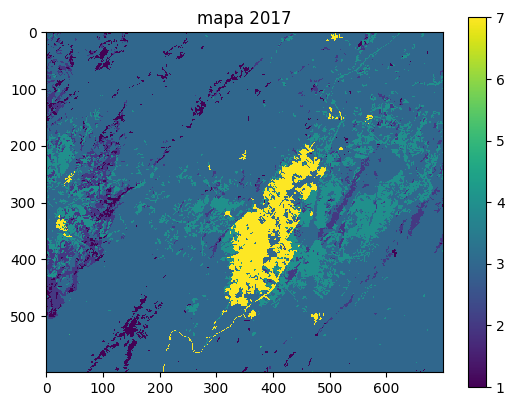

In [45]:
tif_path_2017 = "/content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2017.tif"
test_func_2017 = load_tif(tif_path_2017)

plt.imshow(test_func_2017, cmap='viridis', interpolation='nearest')
plt.title("mapa 2017")
plt.colorbar()
plt.show()


In [46]:
tif_path = "/content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-1985.tif"
with rasterio.open(tif_path) as dataset:
    band1 = dataset.read(1)
with rasterio.open(tif_path) as src:
    transform = src.transform
    crs = src.crs
    width = src.width
    height = src.height
    count = src.count
    dtype = src.dtypes
    bounds = src.bounds
    profile = src.profile
    array_shape = (src.count, src.height, src.width)

    print("Transform:", transform)
    print("CRS:", crs)
    print("Tamaño (ancho x alto):", width, "x", height)
    print("Número de bandas:", count)
    print("Tipo de datos por banda:", dtype)
    print("Límites geográficos (bounds):", bounds)
    print("profile:", profile)
    print("array_shape:", array_shape)

def transform_map_to_initial(map1, map_ref ):
  map_out = 0*map_ref.copy()
  for i in range(0,len(map_ref)):
    for j in range(0,len(map_ref[0])):
      if i<y_low or i>=y_high or j<x_low or j>=x_high:
        map_out[i,j] = 5
      else:
        map_out[i,j] = map1[i-y_low,j-x_low]
  return map_out

def save_tif_file(map_test, name):
  map_test = transform_map_to_initial( diff_maps(test_func_2023,new_map) , band1 )
  with rasterio.Env():
      with rasterio.open(name, 'w', **profile) as dst:
          dst.write(map_test.astype(rasterio.uint8), 1)


Transform: | 0.00, 0.00,-74.67|
| 0.00,-0.00, 7.06|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Tamaño (ancho x alto): 10144 x 8975
Número de bandas: 1
Tipo de datos por banda: ('uint8',)
Límites geográficos (bounds): BoundingBox(left=-74.67425462300348, bottom=4.646086649466168, right=-71.94050155037095, top=7.06480055195798)
profile: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 10144, 'height': 8975, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.00026949458523585647, 0.0, -74.67425462300348,
       0.0, -0.00026949458523585647, 7.06480055195798), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
array_shape: (1, 8975, 1014

Archivo /content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2017.tif cargado correctamente.
Archivo /content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2023.tif cargado correctamente.


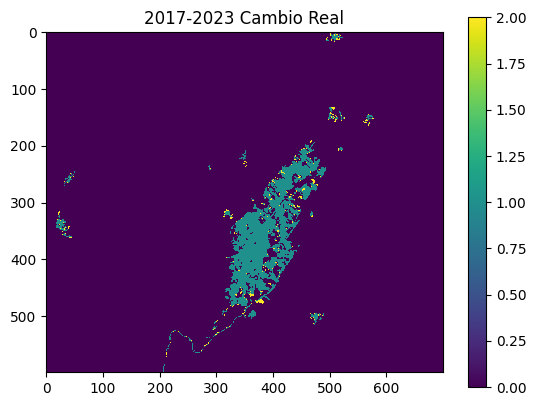

In [47]:

tif_path_2017 = "/content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2017.tif"

tif_path_2023 = "/content/drive/MyDrive/Colab Notebooks/mapas/mapbiomas-colombia-collection-20-boyaca-2023.tif"


test_func_2017 = load_tif(tif_path_2017)
test_func_2023 = load_tif(tif_path_2023)

#plt.imshow(test_func, cmap='viridis', interpolation='nearest')
plt.imshow(diff_maps(test_func_2017,test_func_2023), cmap='viridis', interpolation='nearest')
plt.title("2017-2023 Cambio Real")
plt.colorbar()
plt.show()

map_write_name = path_colab + "Real 2017-2023" + ".tif"
map_real_2017_to_2023 = transform_map_to_initial( diff_maps(test_func_2017,test_func_2023), band1)
with rasterio.Env():
    with rasterio.open(map_write_name, 'w', **profile) as dst:
        dst.write(map_real_2017_to_2023.astype(rasterio.uint8), 1)

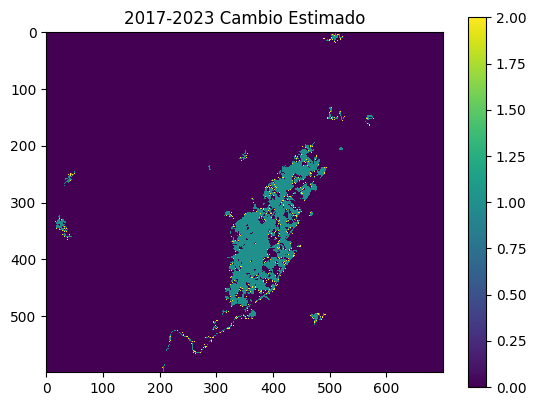

In [48]:
plt.imshow(diff_maps(test_func_2017,new_map), cmap='viridis', interpolation='nearest')
plt.title("2017-2023 Cambio Estimado")
plt.colorbar()
plt.show()

map_write_name = path_colab + "Estimado 2017-2023" + ".tif"
map_pred_2017_to_2023 = transform_map_to_initial( diff_maps(test_func_2017,map_pred_2023), band1)
with rasterio.Env():
    with rasterio.open(map_write_name, 'w', **profile) as dst:
        dst.write(map_pred_2017_to_2023.astype(rasterio.uint8), 1)

## Solo por referencia, prediccion a futuro usando el entrenamientos con datos de 2006 a 2017

1año de validacion: 2023
nuevas celdas predichas 217
2año de validacion: 2024
nuevas celdas predichas 252
2año de validacion: 2025
nuevas celdas predichas 260
2año de validacion: 2026
nuevas celdas predichas 219
2año de validacion: 2027
nuevas celdas predichas 267
2año de validacion: 2028
nuevas celdas predichas 270
2año de validacion: 2029
nuevas celdas predichas 268
2año de validacion: 2030
nuevas celdas predichas 260
2año de validacion: 2031
nuevas celdas predichas 273
2año de validacion: 2032
nuevas celdas predichas 276
2año de validacion: 2033
nuevas celdas predichas 288


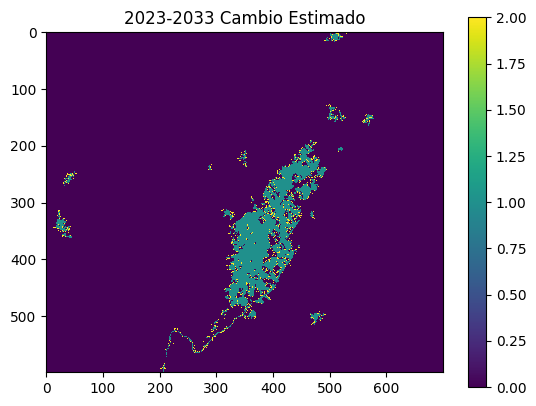

2año de validacion: 2034
nuevas celdas predichas 275
2año de validacion: 2035
nuevas celdas predichas 311
2año de validacion: 2036
nuevas celdas predichas 286
2año de validacion: 2037
nuevas celdas predichas 303
2año de validacion: 2038
nuevas celdas predichas 328
2año de validacion: 2039
nuevas celdas predichas 289
2año de validacion: 2040
nuevas celdas predichas 340
2año de validacion: 2041
nuevas celdas predichas 336
2año de validacion: 2042
nuevas celdas predichas 320
2año de validacion: 2043
nuevas celdas predichas 329


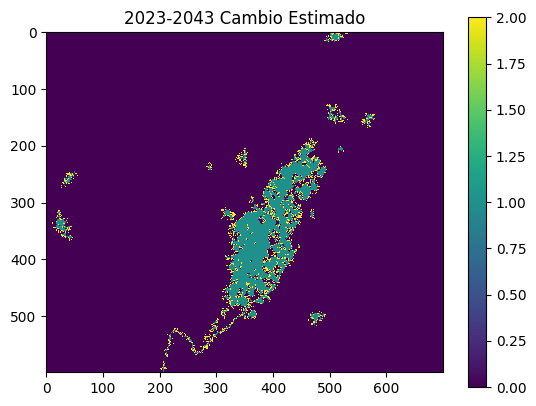

2año de validacion: 2044
nuevas celdas predichas 358
2año de validacion: 2045
nuevas celdas predichas 349
2año de validacion: 2046
nuevas celdas predichas 319
2año de validacion: 2047
nuevas celdas predichas 375
2año de validacion: 2048
nuevas celdas predichas 349
2año de validacion: 2049
nuevas celdas predichas 351
2año de validacion: 2050
nuevas celdas predichas 366
2año de validacion: 2051
nuevas celdas predichas 358
2año de validacion: 2052
nuevas celdas predichas 384
2año de validacion: 2053
nuevas celdas predichas 366


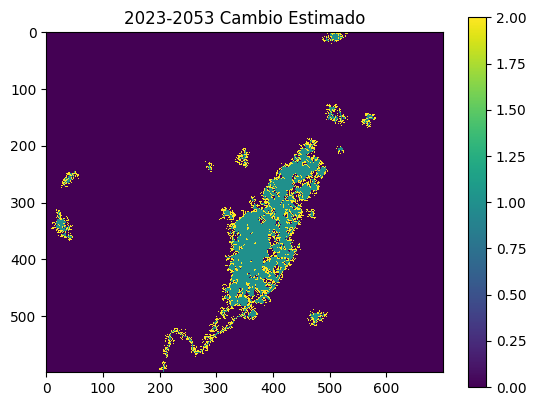

2año de validacion: 2054
nuevas celdas predichas 341
2año de validacion: 2055
nuevas celdas predichas 365
2año de validacion: 2056
nuevas celdas predichas 345
2año de validacion: 2057
nuevas celdas predichas 352
2año de validacion: 2058
nuevas celdas predichas 378
2año de validacion: 2059
nuevas celdas predichas 395
2año de validacion: 2060
nuevas celdas predichas 352
2año de validacion: 2061
nuevas celdas predichas 360
2año de validacion: 2062
nuevas celdas predichas 371
2año de validacion: 2063
nuevas celdas predichas 362
2año de validacion: 2064
nuevas celdas predichas 394
2año de validacion: 2065
nuevas celdas predichas 378
2año de validacion: 2066
nuevas celdas predichas 386
2año de validacion: 2067
nuevas celdas predichas 367
2año de validacion: 2068
nuevas celdas predichas 389
2año de validacion: 2069
nuevas celdas predichas 353
2año de validacion: 2070
nuevas celdas predichas 367
2año de validacion: 2071
nuevas celdas predichas 396
2año de validacion: 2072
nuevas celdas predich

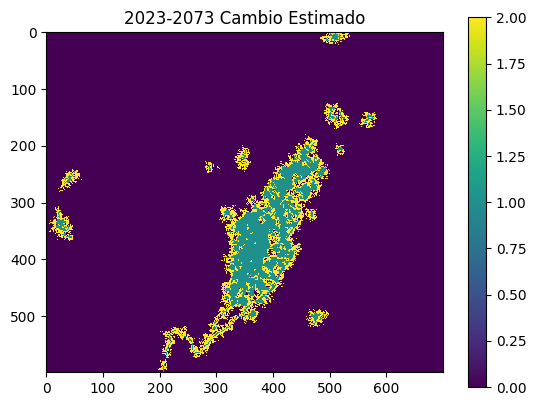

2año de validacion: 2074
nuevas celdas predichas 379
2año de validacion: 2075
nuevas celdas predichas 396
2año de validacion: 2076
nuevas celdas predichas 364
2año de validacion: 2077
nuevas celdas predichas 389
2año de validacion: 2078
nuevas celdas predichas 383
2año de validacion: 2079
nuevas celdas predichas 363
2año de validacion: 2080
nuevas celdas predichas 403
2año de validacion: 2081
nuevas celdas predichas 371
2año de validacion: 2082
nuevas celdas predichas 352
2año de validacion: 2083
nuevas celdas predichas 386
2año de validacion: 2084
nuevas celdas predichas 368
2año de validacion: 2085
nuevas celdas predichas 346
2año de validacion: 2086
nuevas celdas predichas 333
2año de validacion: 2087
nuevas celdas predichas 397
2año de validacion: 2088
nuevas celdas predichas 341
2año de validacion: 2089
nuevas celdas predichas 382
2año de validacion: 2090
nuevas celdas predichas 367
2año de validacion: 2091
nuevas celdas predichas 396
2año de validacion: 2092
nuevas celdas predich

In [ ]:
count_train_pred =0
count_train_real = 0
count_test_pred =0
count_test_real = 0

year_count = 0
for year in range(2023,2101):  # (1986,2023)
  year_count += 1
  if year_count==1:
    print("1año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(maps_dic[str(year)], model_nn , FINAL_SCALE_FACTOR )
    new_map , count_test_pred_year = next_map_prediction(maps_dic[str(year)], model_nn )
    print("nuevas celdas predichas", count_test_pred_year)
  else:
    print("2año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(new_map, model_nn , FINAL_SCALE_FACTOR )   # next_map_prediction
    new_map , count_test_pred_year = next_map_prediction(new_map, model_nn )
    print("nuevas celdas predichas", count_test_pred_year)
    if year == 2033:
      new_map33 = new_map
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2033 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2043:
      new_map43 = new_map
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2043 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2053:
      new_map53 = new_map
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2053 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2073:
      new_map73 = new_map
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2073 Cambio Estimado")
      plt.colorbar()
      plt.show()




# Ahora se reentrenara todo incluyendo los datos de 2018 a 2023


In [ ]:
data_test = np.array([])
year_low_to_up =[]
count_year = 0
for year in range(2006,2023):
  count_year+=1
  print(year)
  data_test_year = find_points_features(maps_dic[str(year)], maps_edges[str(year)], maps_dic[str(year+1)])
  if count_year==1:
    year_low_to_up = data_test_year
  else:
    year_low_to_up = np.concatenate((year_low_to_up, data_test_year))



2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [ ]:
data_test_2 = []
for arr_i in year_low_to_up:
  if arr_i[3]>2:
    count+=1
    data_test_2.append(arr_i)
print(count)

8722


In [ ]:
train_loader = torch.utils.data.DataLoader(year_low_to_up, batch_size=2500, shuffle=True)

model_nn = NN_simple()

learning_ratio = 0.0001
optimizer = torch.optim.Adam(model_nn.parameters(), lr=learning_ratio , eps=1e-06, betas=(0.3, 0.999) )
#optimizer = torch.optim.AdamW(model_nn.parameters(), lr=learning_ratio , eps=1e-06, betas=(0.2, 0.999))
optimizer2 = torch.optim.Adam(model_nn.parameters(), lr=1*learning_ratio , eps=1e-06, betas=(0.3, 0.999) )
optimizer3 = torch.optim.SGD(model_nn.parameters(), lr=0.5*learning_ratio )
#optimizer = torch.optim.SGD(model_nn.parameters(), lr=learning_ratio )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model_nn.train()
epochs = 600

opt_1 = True
opt_2 = True

for epoch in range(epochs):
  loss1_arr = []
  for index, data in enumerate(train_loader):
    if len(data)<2000:
      continue
    #print(index,data)
    eee = model_nn(data[:,:3])
    labels = data[:,-1]
    labels = torch.reshape(labels, (int(list(labels.shape)[0]),1))
    loss1 = r2_score_torch(eee, labels)
    if index%12000==10000:
      print(loss1.item())
    loss1.backward()
    if opt_1:
      optimizer.step()
    elif opt_2:
      optimizer2.step()
    else:
      optimizer3.step()
  loss1_arr.append(loss1.item() )
  loss1_epoch = np.array(loss1_arr)
  loss1_epoch = loss1_epoch.mean()
  if epoch==0:
    loss_control = loss1.item()
  if loss1_epoch < 0  and opt_1:
    opt_1 = False
    print("cambio a optimizador1")
  if loss1_epoch < 0  and opt_2  :
    opt_2 = False
    print("cambio a optimizador2")
  #print(epoch, " ", loss1_epoch)

  #aaa_H = np.array(data_test_2)
  aaa_H = torch.tensor(data_test_2, dtype=torch.float32)#.to(device)
  aaa_out_H = model_nn( aaa_H[:,:3] )
  #aaa = np.array(year_low_to_up)
  aaa = torch.tensor(year_low_to_up, dtype=torch.float32)#.to(device)
  aaa_out = model_nn( aaa[:,:3] )
  print(epoch, " ", loss1_epoch, "   ", torch.mean(aaa_out), "11" , torch.mean(aaa_H[:,-1])/torch.mean(aaa_out_H) , " ",  torch.mean(aaa[:,-1])/torch.mean(aaa_out))


0   3.227141857147217     tensor(0.1963, grad_fn=<MeanBackward0>) 11 tensor(0.1371, grad_fn=<DivBackward0>)   tensor(0.3329, grad_fn=<DivBackward0>)
1   3.2377514839172363     tensor(0.1932, grad_fn=<MeanBackward0>) 11 tensor(0.1386, grad_fn=<DivBackward0>)   tensor(0.3383, grad_fn=<DivBackward0>)
2   3.247279644012451     tensor(0.1900, grad_fn=<MeanBackward0>) 11 tensor(0.1402, grad_fn=<DivBackward0>)   tensor(0.3441, grad_fn=<DivBackward0>)
3   3.120476484298706     tensor(0.1865, grad_fn=<MeanBackward0>) 11 tensor(0.1419, grad_fn=<DivBackward0>)   tensor(0.3504, grad_fn=<DivBackward0>)
4   2.8978333473205566     tensor(0.1828, grad_fn=<MeanBackward0>) 11 tensor(0.1437, grad_fn=<DivBackward0>)   tensor(0.3575, grad_fn=<DivBackward0>)
5   2.9172122478485107     tensor(0.1786, grad_fn=<MeanBackward0>) 11 tensor(0.1457, grad_fn=<DivBackward0>)   tensor(0.3660, grad_fn=<DivBackward0>)
6   2.7672278881073     tensor(0.1739, grad_fn=<MeanBackward0>) 11 tensor(0.1478, grad_fn=<DivBackward0

In [ ]:
torch.save(model_nn.state_dict(), "/content/drive/MyDrive/Colab Notebooks/2006-2023-model_Checkpoint.pt")

In [52]:
model_nn.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/2006-2023-model_Checkpoint.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

1año de validacion: 2023
nuevas celdas predichas 243
2año de validacion: 2024
nuevas celdas predichas 227
2año de validacion: 2025
nuevas celdas predichas 247
2año de validacion: 2026
nuevas celdas predichas 264
2año de validacion: 2027
nuevas celdas predichas 295
2año de validacion: 2028
nuevas celdas predichas 241
2año de validacion: 2029
nuevas celdas predichas 258
2año de validacion: 2030
nuevas celdas predichas 254
2año de validacion: 2031
nuevas celdas predichas 267
2año de validacion: 2032
nuevas celdas predichas 277
2año de validacion: 2033
nuevas celdas predichas 280


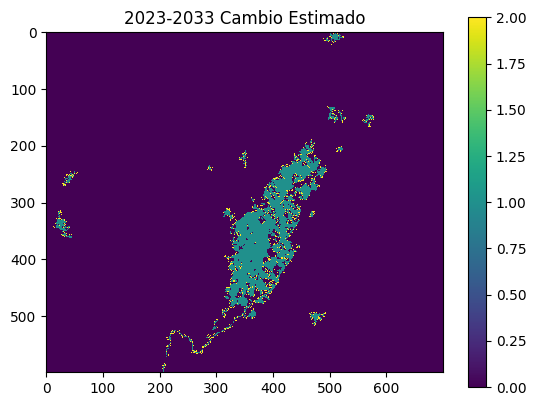

2año de validacion: 2034
nuevas celdas predichas 277
2año de validacion: 2035
nuevas celdas predichas 268
2año de validacion: 2036
nuevas celdas predichas 288
2año de validacion: 2037
nuevas celdas predichas 304
2año de validacion: 2038
nuevas celdas predichas 293
2año de validacion: 2039
nuevas celdas predichas 306
2año de validacion: 2040
nuevas celdas predichas 318
2año de validacion: 2041
nuevas celdas predichas 296
2año de validacion: 2042
nuevas celdas predichas 318
2año de validacion: 2043
nuevas celdas predichas 331


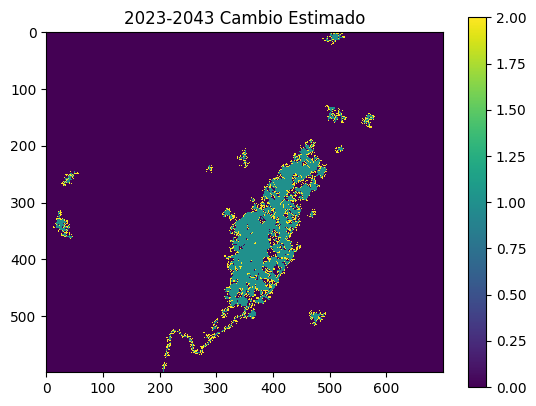

2año de validacion: 2044
nuevas celdas predichas 334
2año de validacion: 2045
nuevas celdas predichas 323
2año de validacion: 2046
nuevas celdas predichas 290
2año de validacion: 2047
nuevas celdas predichas 326
2año de validacion: 2048
nuevas celdas predichas 314
2año de validacion: 2049
nuevas celdas predichas 318
2año de validacion: 2050
nuevas celdas predichas 336
2año de validacion: 2051
nuevas celdas predichas 305
2año de validacion: 2052
nuevas celdas predichas 326
2año de validacion: 2053
nuevas celdas predichas 326


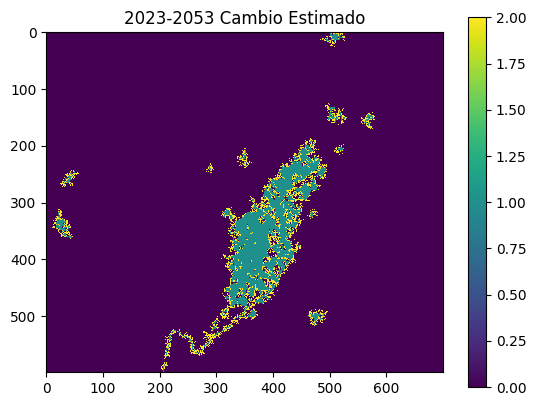

2año de validacion: 2054
nuevas celdas predichas 354
2año de validacion: 2055
nuevas celdas predichas 301
2año de validacion: 2056
nuevas celdas predichas 328
2año de validacion: 2057
nuevas celdas predichas 334
2año de validacion: 2058
nuevas celdas predichas 365
2año de validacion: 2059
nuevas celdas predichas 360
2año de validacion: 2060
nuevas celdas predichas 355
2año de validacion: 2061
nuevas celdas predichas 355
2año de validacion: 2062
nuevas celdas predichas 347
2año de validacion: 2063
nuevas celdas predichas 331
2año de validacion: 2064
nuevas celdas predichas 361
2año de validacion: 2065
nuevas celdas predichas 367
2año de validacion: 2066
nuevas celdas predichas 348
2año de validacion: 2067
nuevas celdas predichas 333
2año de validacion: 2068
nuevas celdas predichas 318
2año de validacion: 2069
nuevas celdas predichas 338
2año de validacion: 2070
nuevas celdas predichas 338
2año de validacion: 2071
nuevas celdas predichas 310
2año de validacion: 2072
nuevas celdas predich

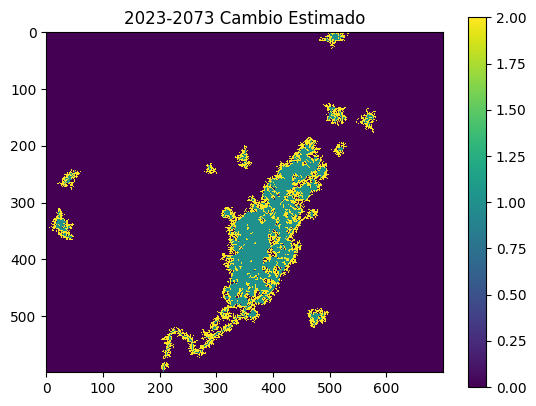

2año de validacion: 2074
nuevas celdas predichas 347
2año de validacion: 2075
nuevas celdas predichas 354
2año de validacion: 2076
nuevas celdas predichas 346
2año de validacion: 2077
nuevas celdas predichas 338
2año de validacion: 2078
nuevas celdas predichas 350
2año de validacion: 2079
nuevas celdas predichas 351
2año de validacion: 2080
nuevas celdas predichas 363
2año de validacion: 2081
nuevas celdas predichas 388
2año de validacion: 2082
nuevas celdas predichas 377
2año de validacion: 2083
nuevas celdas predichas 393
2año de validacion: 2084
nuevas celdas predichas 336
2año de validacion: 2085
nuevas celdas predichas 348
2año de validacion: 2086
nuevas celdas predichas 326
2año de validacion: 2087
nuevas celdas predichas 361
2año de validacion: 2088
nuevas celdas predichas 359
2año de validacion: 2089
nuevas celdas predichas 324
2año de validacion: 2090
nuevas celdas predichas 337
2año de validacion: 2091
nuevas celdas predichas 351
2año de validacion: 2092
nuevas celdas predich

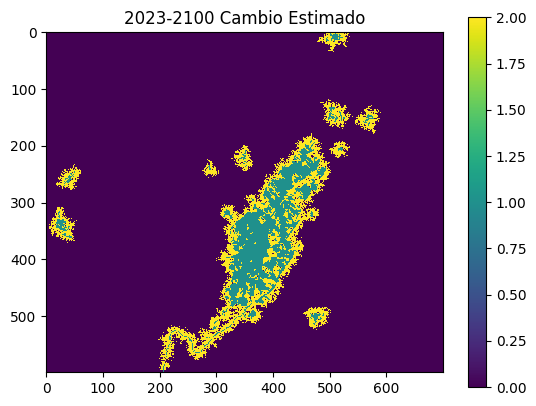

2año de validacion: 2101
nuevas celdas predichas 356
2año de validacion: 2102
nuevas celdas predichas 338
2año de validacion: 2103
nuevas celdas predichas 344
2año de validacion: 2104
nuevas celdas predichas 327
2año de validacion: 2105
nuevas celdas predichas 366
2año de validacion: 2106
nuevas celdas predichas 325
2año de validacion: 2107
nuevas celdas predichas 348
2año de validacion: 2108
nuevas celdas predichas 378
2año de validacion: 2109
nuevas celdas predichas 340
2año de validacion: 2110
nuevas celdas predichas 356
2año de validacion: 2111
nuevas celdas predichas 363
2año de validacion: 2112
nuevas celdas predichas 348
2año de validacion: 2113
nuevas celdas predichas 394
2año de validacion: 2114
nuevas celdas predichas 349
2año de validacion: 2115
nuevas celdas predichas 339
2año de validacion: 2116
nuevas celdas predichas 357
2año de validacion: 2117
nuevas celdas predichas 368
2año de validacion: 2118
nuevas celdas predichas 324
2año de validacion: 2119
nuevas celdas predich

KeyboardInterrupt: 

In [54]:
count_train_pred =0
count_train_real = 0
count_test_pred =0
count_test_real = 0

year_count = 0
for year in range(2023,2101):  # (1986,2023)
  year_count += 1
  if year_count==1:
    print("1año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(maps_dic[str(year)], model_nn , FINAL_SCALE_FACTOR )
    new_map , count_test_pred_year = next_map_prediction(maps_dic[str(year)], model_nn )
    print("nuevas celdas predichas", count_test_pred_year)
  else:
    print("2año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(new_map, model_nn , FINAL_SCALE_FACTOR )   # next_map_prediction
    new_map , count_test_pred_year = next_map_prediction(new_map, model_nn )
    print("nuevas celdas predichas", count_test_pred_year)
    if year == 2033:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map33 = transform_map_to_initial( diff_maps(test_func_2023,new_map), band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map33.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2033 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2043:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map43 = transform_map_to_initial( diff_maps(test_func_2023,new_map), band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map43.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2043 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2053:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map53 = transform_map_to_initial( diff_maps(test_func_2023,new_map) , band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map53.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2053 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2073:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map73 =transform_map_to_initial( diff_maps(test_func_2023,new_map) , band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map73.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2073 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2100:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map100 =transform_map_to_initial( diff_maps(test_func_2023,new_map) , band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map100.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2100 Cambio Estimado")
      plt.colorbar()
      plt.show()


In [ ]:
map_write_name = path_colab + "Prediccion " + str(33) + ".tif"

with rasterio.open(map_write_name) as dataset:
    band1 = dataset.read(1)
test33 = band1[y_low:y_high]
test33 = test33[:,x_low:x_high]

plt.imshow(test33, cmap='viridis', interpolation='nearest')
plt.title("Primera banda")
plt.colorbar()
plt.show()


In [ ]:
!ls

drive  example.tif  sample_data


1año de validacion: 2023
nuevas celdas predichas 231
2año de validacion: 2024
nuevas celdas predichas 235
2año de validacion: 2025
nuevas celdas predichas 265
2año de validacion: 2026
nuevas celdas predichas 249
2año de validacion: 2027
nuevas celdas predichas 254
2año de validacion: 2028
nuevas celdas predichas 247
2año de validacion: 2029
nuevas celdas predichas 262
2año de validacion: 2030
nuevas celdas predichas 254
2año de validacion: 2031
nuevas celdas predichas 272
2año de validacion: 2032
nuevas celdas predichas 273
2año de validacion: 2033
nuevas celdas predichas 310


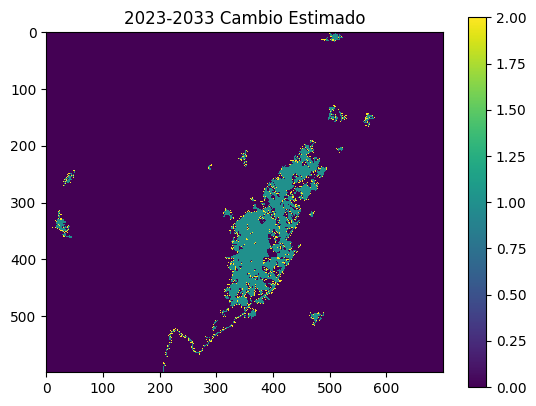

2año de validacion: 2034
nuevas celdas predichas 294
2año de validacion: 2035
nuevas celdas predichas 290
2año de validacion: 2036
nuevas celdas predichas 302
2año de validacion: 2037
nuevas celdas predichas 302
2año de validacion: 2038
nuevas celdas predichas 293
2año de validacion: 2039
nuevas celdas predichas 304
2año de validacion: 2040
nuevas celdas predichas 297
2año de validacion: 2041
nuevas celdas predichas 306
2año de validacion: 2042
nuevas celdas predichas 311
2año de validacion: 2043
nuevas celdas predichas 328


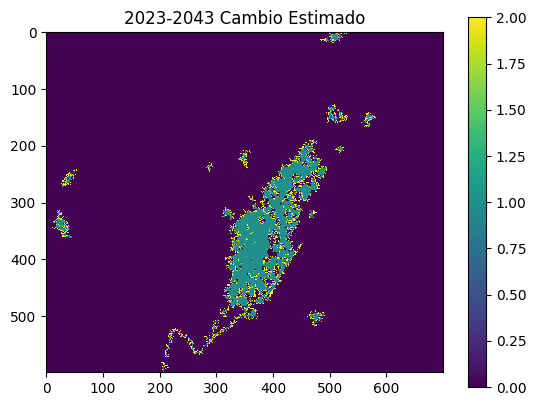

2año de validacion: 2044
nuevas celdas predichas 306
2año de validacion: 2045
nuevas celdas predichas 323
2año de validacion: 2046
nuevas celdas predichas 340
2año de validacion: 2047
nuevas celdas predichas 349
2año de validacion: 2048
nuevas celdas predichas 316
2año de validacion: 2049
nuevas celdas predichas 336
2año de validacion: 2050
nuevas celdas predichas 326
2año de validacion: 2051
nuevas celdas predichas 347
2año de validacion: 2052
nuevas celdas predichas 313
2año de validacion: 2053
nuevas celdas predichas 371


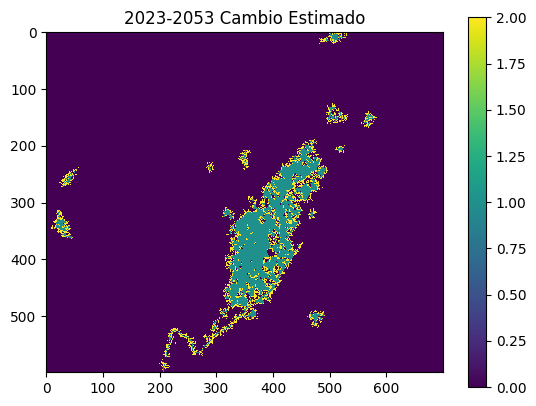

2año de validacion: 2054
nuevas celdas predichas 353
2año de validacion: 2055
nuevas celdas predichas 351
2año de validacion: 2056
nuevas celdas predichas 332
2año de validacion: 2057
nuevas celdas predichas 332
2año de validacion: 2058
nuevas celdas predichas 322
2año de validacion: 2059
nuevas celdas predichas 351
2año de validacion: 2060
nuevas celdas predichas 324
2año de validacion: 2061
nuevas celdas predichas 332
2año de validacion: 2062
nuevas celdas predichas 364
2año de validacion: 2063
nuevas celdas predichas 348
2año de validacion: 2064
nuevas celdas predichas 349
2año de validacion: 2065
nuevas celdas predichas 343
2año de validacion: 2066
nuevas celdas predichas 338
2año de validacion: 2067
nuevas celdas predichas 352
2año de validacion: 2068
nuevas celdas predichas 327
2año de validacion: 2069
nuevas celdas predichas 363
2año de validacion: 2070
nuevas celdas predichas 369
2año de validacion: 2071
nuevas celdas predichas 339
2año de validacion: 2072
nuevas celdas predich

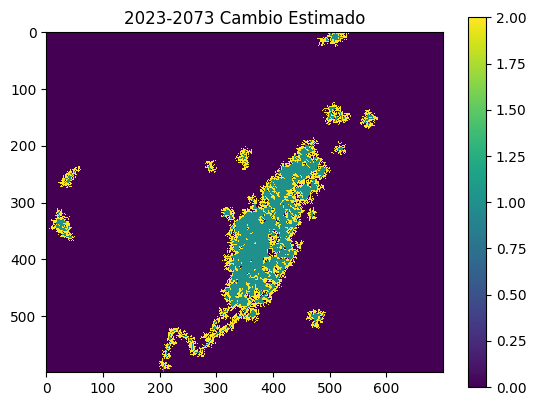

2año de validacion: 2074
nuevas celdas predichas 332
2año de validacion: 2075
nuevas celdas predichas 386
2año de validacion: 2076
nuevas celdas predichas 357
2año de validacion: 2077
nuevas celdas predichas 351
2año de validacion: 2078
nuevas celdas predichas 349
2año de validacion: 2079
nuevas celdas predichas 346
2año de validacion: 2080
nuevas celdas predichas 336
2año de validacion: 2081
nuevas celdas predichas 401
2año de validacion: 2082
nuevas celdas predichas 337
2año de validacion: 2083
nuevas celdas predichas 369
2año de validacion: 2084
nuevas celdas predichas 364
2año de validacion: 2085
nuevas celdas predichas 347
2año de validacion: 2086
nuevas celdas predichas 407
2año de validacion: 2087
nuevas celdas predichas 349
2año de validacion: 2088
nuevas celdas predichas 345
2año de validacion: 2089
nuevas celdas predichas 359
2año de validacion: 2090
nuevas celdas predichas 361
2año de validacion: 2091
nuevas celdas predichas 353
2año de validacion: 2092
nuevas celdas predich

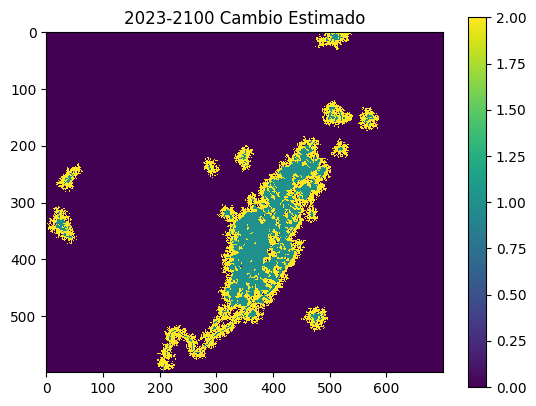

In [63]:
count_train_pred =0
count_train_real = 0
count_test_pred =0
count_test_real = 0

year_count = 0
for year in range(2023,2101):  # (1986,2023)
  year_count += 1
  if year_count==1:
    print("1año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(maps_dic[str(year)], model_nn , FINAL_SCALE_FACTOR )
    new_map , count_test_pred_year = next_map_prediction(maps_dic[str(year)], model_nn )
    print("nuevas celdas predichas", count_test_pred_year)
  else:
    print("2año de validacion:", year)
    #new_map , count_test_pred_year = next_map_prediction_final(new_map, model_nn , FINAL_SCALE_FACTOR )   # next_map_prediction
    new_map , count_test_pred_year = next_map_prediction(new_map, model_nn )
    print("nuevas celdas predichas", count_test_pred_year)
    if year == 2033:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map33 = transform_map_to_initial( diff_maps(test_func_2023,new_map), band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map33.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2033 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2043:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map43 = transform_map_to_initial( diff_maps(test_func_2023,new_map), band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map43.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2043 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2053:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map53 = transform_map_to_initial( diff_maps(test_func_2023,new_map) , band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map53.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2053 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2073:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map73 =transform_map_to_initial( diff_maps(test_func_2023,new_map) , band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map73.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2073 Cambio Estimado")
      plt.colorbar()
      plt.show()
    if year == 2100:
      map_write_name = path_colab + "Prediccion " + str(year) + ".tif"
      new_map100 =transform_map_to_initial( diff_maps(test_func_2023,new_map) , band1)
      with rasterio.Env():
          with rasterio.open(map_write_name, 'w', **profile) as dst:
              dst.write(new_map100.astype(rasterio.uint8), 1)
      plt.imshow(diff_maps(test_func_2023,new_map), cmap='viridis', interpolation='nearest')
      plt.title("2023-2100 Cambio Estimado")
      plt.colorbar()
      plt.show()
